 ## Problem Description

### Predict if the Merchant is Fraudster or not for an e-commerce client

### ‘XYZ’ is a large e-commerce company with its operations in several countries. As the online giant grows, so has the number of fraudster merchants are. They deliver counterfeits or, in some cases, nothing at all. Such schemes leave customers duped, and place both legitimate merchants and the company itself in a constant battle to rid the marketplace of scammers. Determining this is also important in budgeting for fraud investigation. It's a well-known problem both to the company and to merchants, which they say hasn't effectively addressed the issue. They are serious about it and want to protect themselves from these fraudulent merchants using technology.
### You are expected to create an analytical and modelling framework to predict the Merchant Fraudulency(yes/no) based on the quantitative and qualitative features provided in the dataset while answering other questions too cited below.

### Problem Statement

### Predict if the Merchant is Fraudster or not for an e-commerce client

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


Importing the libraries

In [10]:
import os
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
os.getcwd()

'/content'

Loading the Data sets

In [11]:
train_order=pd.read_csv("/gdrive/My Drive/Classification Problem - Predict if the Merchant is a Fraudster/train_order_data.csv")
train_merchant=pd.read_csv("/gdrive/My Drive/Classification Problem - Predict if the Merchant is a Fraudster/train_merchant_data.csv")
traindata=pd.read_csv("/gdrive/My Drive/Classification Problem - Predict if the Merchant is a Fraudster/train.csv")

In [5]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [12]:

pandas_profiling.ProfileReport(traindata)


importing the test data


In [13]:
test_order=pd.read_csv("/gdrive/My Drive/Classification Problem - Predict if the Merchant is a Fraudster/test_order_data.csv")
test_merchant=pd.read_csv("/gdrive/My Drive/Classification Problem - Predict if the Merchant is a Fraudster/test_merchant_data.csv")
testdata = pd.read_csv("/gdrive/My Drive/Classification Problem - Predict if the Merchant is a Fraudster/test.csv")

In [14]:
pandas_profiling.ProfileReport(test_order)

In [15]:
pandas_profiling.ProfileReport(test_order)

In [16]:
train_order.head()


Customer_ID      Order_ID  ... Order_Payment_Method  Merchant_ID
0       126221  37cea9512f8d  ...          Credit Card       124231
1       115471  09f12e6efde2  ...          Credit Card       136178
2       151786  4e69e956e159  ...     Internet Banking       198611
3       140456  663443aaeb82  ...           Debit Card       127993
4       114721  99258810c121  ...          Credit Card       250146

[5 rows x 7 columns]

In [17]:
train_merchant.head()

Ecommerce_Provider_ID  Merchant_ID  ... Age      IP_Address
0                1746213        50448  ...  39   48.151.136.76
1                1746213       338754  ...  35    94.9.145.169
2                1746213       291127  ...  40   58.94.157.121
3                1746213       319919  ...  37  193.187.41.186
4                1746213       195911  ...  27   125.96.20.172

[5 rows x 7 columns]

In [18]:
traindata.head()


Merchant_ID  Fraudster
0       221592          0
1       316935          1
2        38454          1
3       214437          1
4       296240          1

In [19]:
test_order.head()

Customer_ID      Order_ID  ... Order_Payment_Method  Merchant_ID
0       157068  a032de091f51  ...          Credit Card        53637
1       112534  0d563f0606d6  ...          Credit Card       243517
2       148774  18fb0fa888b6  ...           Debit Card       343640
3       114528  ed1eb920d721  ...          Credit Card        69889
4       120940  313dcf962627  ...          Credit Card       125706

[5 rows x 7 columns]

In [20]:
test_merchant.head()


Ecommerce_Provider_ID  Merchant_ID  ... Age      IP_Address
0                1746213        53637  ...  40  134.162.124.62
1                1746213       243517  ...  39    152.76.98.87
2                1746213       343640  ...  23    31.202.3.255
3                1746213        69889  ...  34  12.242.168.185
4                1746213       125706  ...  20    26.61.210.47

[5 rows x 7 columns]

In [21]:
#Merging the datasets: Test and Train
merged_train=train_order.merge(train_merchant, on="Merchant_ID").merge(traindata, on="Merchant_ID")
merged_test=test_order.merge(test_merchant, on="Merchant_ID")

In [22]:
merged_train.head(2)

Customer_ID      Order_ID  ...       IP_Address  Fraudster
0       126221  37cea9512f8d  ...   37.113.112.143          0
1       115471  09f12e6efde2  ...  190.255.172.133          0

[2 rows x 14 columns]

In [23]:
merged_test.head(2)

Customer_ID      Order_ID        Date_of_Order  ...  Gender Age      IP_Address
0       157068  a032de091f51  2018-03-09 09:09:42  ...       F  40  134.162.124.62
1       112534  0d563f0606d6  2018-06-13 20:11:19  ...       M  39    152.76.98.87

[2 rows x 13 columns]

In [24]:
merged_train['Fraudster'].value_counts()

0    49188
1     5025
Name: Fraudster, dtype: int64

In [25]:
merged_train.sample(2)


Customer_ID      Order_ID  ...     IP_Address  Fraudster
34334       154444  9994d9a4a3b5  ...  148.34.178.20          1
24856       123926  60734778c3a8  ...     90.0.87.92          0

[2 rows x 14 columns]

In [27]:
merged_test.sample(5)

Customer_ID      Order_ID  ... Age       IP_Address
1211        133723  eeb7127d4e69  ...  36     130.23.218.0
12074       152555  7afbb82bdca1  ...  37    46.54.210.170
8703        148756  e5beb3f29dff  ...  25  203.242.150.223
6660        152525  be07cc22cc01  ...  26   169.203.184.43
11404       129399  ba2e5494386c  ...  33   129.11.231.208

[5 rows x 13 columns]

Installing the package to get the IP address to match with the countries

In [28]:
pip install maxminddb-geolite2

     |████████████████████████████████| 26.1MB 173kB/s 
     |████████████████████████████████| 286kB 45.5MB/s 
  Created wheel for maxminddb-geolite2: filename=maxminddb_geolite2-2018.703-cp36-none-any.whl size=26407039 sha256=9b01ed306a26c5930e38c50eb9d6f84d2c539888d82aad24481c2ccfa376191d
  Stored in directory: /root/.cache/pip/wheels/94/69/0a/4453d83e882e2c55aa8c8b5b37342e0b4acddb92e808fa9664
  Created wheel for maxminddb: filename=maxminddb-2.0.1-cp36-none-any.whl size=15257 sha256=8d929d090d26b2dbad98efa5b26d71c7119ec2d330d091bd2da96d2bc57caa61
  Stored in directory: /root/.cache/pip/wheels/e6/48/88/c17dc567f70d86b8128356abab22049df4beda01159677b5d5
Successfully built maxminddb-geolite2 maxminddb


In [29]:
from geolite2 import geolite2

def get_continent(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return x['continent']['names']['en'] if x else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()
# IP's for testing: http://upd.emule-security.org/ipfilter.zip
#x = pd.read_csv(r'D:\download\ipfilter.zip',usecols=[0], sep='\s*\-\s*',header=None, names=['ip'])

# get unique IPs
unique_ips = merged_train["IP_Address"].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
merged_train['Continent'] = merged_train['IP_Address'].map(unique_ips.apply(get_continent))

geolite2.close()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  # This is added back by InteractiveShellApp.init_path()


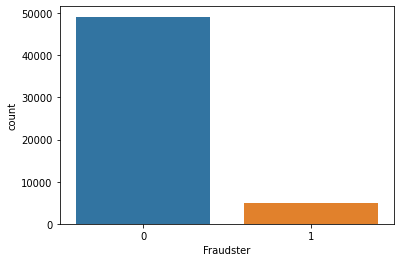

0    90.731005
1     9.268995
Name: Fraudster, dtype: float64

In [30]:
merged_train['Fraudster'].value_counts()
sns.countplot(x='Fraudster',data=merged_train)
plt.show()
(merged_train["Fraudster"].value_counts()/merged_train.shape[0]*100)

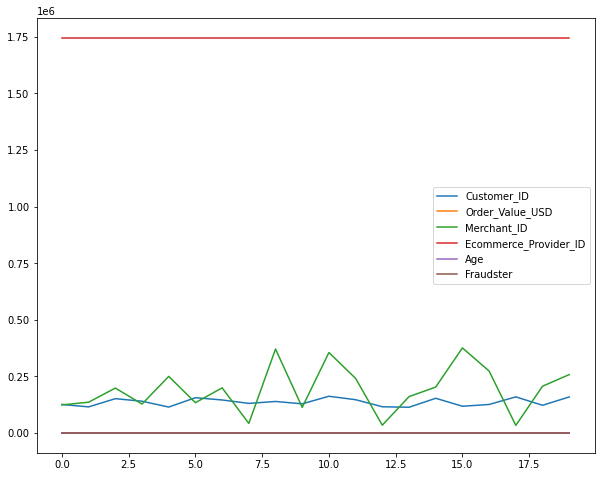

In [31]:
# Line plot
merged_train.head(20).plot(kind='line', figsize=(10,8))
plt.show()

In [32]:
merged_train.sample(10)


Customer_ID      Order_ID  ... Fraudster      Continent
21749       122428  f06ef788da38  ...         0  North America
16098       142531  f7176e3b5f2e  ...         0         Europe
1697        145150  5a8274f8f56e  ...         0         Europe
41122       121821  e0a8419b4245  ...         0  North America
53967       161277  d1c44a2431d5  ...         1  North America
17201       134947  c77656419f0e  ...         0            NaN
51359       121897  4a1697a6cc89  ...         0         Africa
2151        121156  dcdeb80738d4  ...         0            NaN
21932       163515  279304bc5165  ...         0            NaN
47473       112513  1c0d121d9bae  ...         0           Asia

[10 rows x 15 columns]

In [33]:
merged_train['Continent'].isnull().sum()

7751

In [34]:
from geolite2 import geolite2

def get_continent(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return x['continent']['names']['en'] if x else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()

# IP's for testing: http://upd.emule-security.org/ipfilter.zip
#x = pd.read_csv(r'D:\download\ipfilter.zip',usecols=[0], sep='\s*\-\s*',header=None, names=['ip'])

# get unique IPs
unique_ips = merged_test["IP_Address"].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
merged_test['Continent'] = merged_test['IP_Address'].map(unique_ips.apply(get_continent))

geolite2.close()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  # This is added back by InteractiveShellApp.init_path()


In [35]:
merged_train['Continent'].fillna('Unknown', inplace=True)

In [36]:
merged_train.sample(2)

Customer_ID      Order_ID  ... Fraudster      Continent
11167       131395  fa539548251d  ...         0  North America
3769        144991  b4604217ba99  ...         0  North America

[2 rows x 15 columns]

In [37]:
merged_test['Continent'].isnull().sum()

1967

In [38]:
merged_test['Continent'].fillna('Unknown', inplace=True)

In [39]:
conti = pd.crosstab(merged_train.Fraudster, merged_train.Continent)

In [40]:
conti

Continent  Africa   Asia  Europe  ...  Oceania  South America  Unknown
Fraudster                         ...                                 
0             585  10371    8637  ...      711           1661     7100
1              81   1062     849  ...       67            189      651

[2 rows x 7 columns]

Feature engineering

Converting Date_of_order and Merchand_registration_date type as datetime64 for both train and test data

In [41]:
merged_train["Date_of_Order"] = merged_train["Date_of_Order"].astype('datetime64[ns]') 
merged_train["Merchant_Registration_Date"] = merged_train["Merchant_Registration_Date"].astype('datetime64[ns]')

In [42]:
merged_test["Date_of_Order"] = merged_test["Date_of_Order"].astype('datetime64[ns]') 
merged_test["Merchant_Registration_Date"] = merged_test["Merchant_Registration_Date"].astype('datetime64[ns]')

In [43]:
merged_train.head()

Customer_ID      Order_ID  ... Fraudster      Continent
0       126221  37cea9512f8d  ...         0         Europe
1       115471  09f12e6efde2  ...         0  South America
2       151786  4e69e956e159  ...         1         Europe
3       140456  663443aaeb82  ...         0  North America
4       114721  99258810c121  ...         0         Europe

[5 rows x 15 columns]

In [44]:
merged_test.head()

Customer_ID      Order_ID  ...      IP_Address      Continent
0       157068  a032de091f51  ...  134.162.124.62  North America
1       112534  0d563f0606d6  ...    152.76.98.87        Oceania
2       148774  18fb0fa888b6  ...    31.202.3.255         Europe
3       114528  ed1eb920d721  ...  12.242.168.185  North America
4       120940  313dcf962627  ...    26.61.210.47  North America

[5 rows x 14 columns]

Creating a new_feature Difference_Date by substracting Date_of_order and Merchant_registration_date

In [45]:
merged_train["Difference_Dates"]=(merged_train["Date_of_Order"])- ( merged_train["Merchant_Registration_Date"])
merged_test["Difference_Dates"]=(merged_test["Date_of_Order"])- ( merged_test["Merchant_Registration_Date"])


In [46]:
merged_train.head()


Customer_ID      Order_ID  ...      Continent  Difference_Dates
0       126221  37cea9512f8d  ...         Europe  10 days 15:51:06
1       115471  09f12e6efde2  ...  South America  31 days 17:35:03
2       151786  4e69e956e159  ...         Europe  76 days 13:48:31
3       140456  663443aaeb82  ...  North America 117 days 03:49:38
4       114721  99258810c121  ...         Europe 116 days 23:07:37

[5 rows x 16 columns]

In [47]:
merged_test.head()

Customer_ID      Order_ID  ...      Continent  Difference_Dates
0       157068  a032de091f51  ...  North America  25 days 12:19:13
1       112534  0d563f0606d6  ...        Oceania  68 days 06:51:40
2       148774  18fb0fa888b6  ...         Europe  91 days 11:31:47
3       114528  ed1eb920d721  ...  North America  40 days 15:56:52
4       120940  313dcf962627  ...  North America   7 days 10:17:59

[5 rows x 15 columns]

Dividing Difference_dates by day we get the differnce

In [48]:
merged_train["Difference_Dates"]=merged_train["Difference_Dates"]/np.timedelta64(1, "D")
merged_test["Difference_Dates"]=merged_test["Difference_Dates"]/np.timedelta64(1, "D")


In [49]:
merged_train.head()

Customer_ID      Order_ID  ...      Continent  Difference_Dates
0       126221  37cea9512f8d  ...         Europe         10.660486
1       115471  09f12e6efde2  ...  South America         31.732674
2       151786  4e69e956e159  ...         Europe         76.575359
3       140456  663443aaeb82  ...  North America        117.159468
4       114721  99258810c121  ...         Europe        116.963623

[5 rows x 16 columns]

In [50]:
merged_test.head()

Customer_ID      Order_ID  ...      Continent  Difference_Dates
0       157068  a032de091f51  ...  North America         25.513345
1       112534  0d563f0606d6  ...        Oceania         68.285880
2       148774  18fb0fa888b6  ...         Europe         91.480405
3       114528  ed1eb920d721  ...  North America         40.664491
4       120940  313dcf962627  ...  North America          7.429155

[5 rows x 15 columns]

In [51]:
merged_train[merged_train["Difference_Dates"]<=0].Fraudster.value_counts()

Series([], Name: Fraudster, dtype: int64)

In [52]:
merged_train.Fraudster.value_counts()


0    49188
1     5025
Name: Fraudster, dtype: int64

In [53]:
train_dev_Id=merged_train['Registered_Device_ID']
test_dev_id=merged_test['Registered_Device_ID']

In [54]:
train_dev_Id= pd.DataFrame(train_dev_Id)
test_dev_id=pd.DataFrame(test_dev_id)


In [55]:
merged_train['Registered_Device_Count'] = train_dev_Id.apply(lambda x: x.map(x.value_counts()))
merged_test['Registered_Device_Count'] = test_dev_id.apply(lambda x: x.map(x.value_counts()))

In [56]:
merged_train.head()

Customer_ID      Order_ID  ... Difference_Dates  Registered_Device_Count
0       126221  37cea9512f8d  ...        10.660486                        1
1       115471  09f12e6efde2  ...        31.732674                        1
2       151786  4e69e956e159  ...        76.575359                        1
3       140456  663443aaeb82  ...       117.159468                        1
4       114721  99258810c121  ...       116.963623                        1

[5 rows x 17 columns]

In [57]:
merged_test.head()

Customer_ID      Order_ID  ... Difference_Dates  Registered_Device_Count
0       157068  a032de091f51  ...        25.513345                        1
1       112534  0d563f0606d6  ...        68.285880                        1
2       148774  18fb0fa888b6  ...        91.480405                        1
3       114528  ed1eb920d721  ...        40.664491                        1
4       120940  313dcf962627  ...         7.429155                        1

[5 rows x 16 columns]

Binning into Four Levels

In [58]:
bins = [0,3,5,7,10]
labels = ["low","medium","high","very-high"]
merged_train['Binned_Device_Count'] = pd.cut(merged_train['Registered_Device_Count'], bins=bins, labels=labels)
merged_test['Binned_Device_Count'] = pd.cut(merged_test['Registered_Device_Count'], bins=bins, labels=labels)


In [59]:
merged_train.head(10)

Customer_ID      Order_ID  ... Registered_Device_Count  Binned_Device_Count
0       126221  37cea9512f8d  ...                       1                  low
1       115471  09f12e6efde2  ...                       1                  low
2       151786  4e69e956e159  ...                       1                  low
3       140456  663443aaeb82  ...                       1                  low
4       114721  99258810c121  ...                       1                  low
5       156106  f1e5595ef446  ...                       1                  low
6       146054  96d864107383  ...                       1                  low
7       130966  c26e79192d46  ...                       1                  low
8       139404  4bbf3902918f  ...                       1                  low
9       128964  8551ac9908b4  ...                       5               medium

[10 rows x 18 columns]

In [60]:
merged_test.head(10)

Customer_ID      Order_ID  ... Registered_Device_Count  Binned_Device_Count
0       157068  a032de091f51  ...                       1                  low
1       112534  0d563f0606d6  ...                       1                  low
2       148774  18fb0fa888b6  ...                       1                  low
3       114528  ed1eb920d721  ...                       1                  low
4       120940  313dcf962627  ...                       1                  low
5       138132  403af6a56bf6  ...                       1                  low
6       126307  2000c9a7f224  ...                       3                  low
7       156600  14cef8a72083  ...                       1                  low
8       157709  3bd27c578c4f  ...                       1                  low
9       116897  21e5e03d5346  ...                       1                  low

[10 rows x 17 columns]

In [61]:
merged_train['Binned_Device_Count'].value_counts()

low          51985
medium        1168
high           835
very-high      225
Name: Binned_Device_Count, dtype: int64

In [62]:
merged_test['Binned_Device_Count'].value_counts()


low          13473
medium          81
very-high        0
high             0
Name: Binned_Device_Count, dtype: int64

Dropping the columns


In [63]:
merged_train.drop(["Customer_ID", "Order_ID","Date_of_Order","Ecommerce_Provider_ID","Merchant_Registration_Date","Registered_Device_ID","IP_Address","Registered_Device_Count"], axis = 1, inplace = True)

In [64]:
merged_test.drop(["Customer_ID", "Order_ID","Date_of_Order","Ecommerce_Provider_ID","Merchant_Registration_Date","Registered_Device_ID","IP_Address","Registered_Device_Count"], axis = 1, inplace = True)


In [65]:
merged_train.head()

Order_Value_USD Order_Source  ... Difference_Dates  Binned_Device_Count
0              148       Direct  ...        10.660486                  low
1              145          SEO  ...        31.732674                  low
2               62          Ads  ...        76.575359                  low
3               28          SEO  ...       117.159468                  low
4               70          Ads  ...       116.963623                  low

[5 rows x 10 columns]

In [66]:
merged_test.head()

Order_Value_USD Order_Source  ... Difference_Dates  Binned_Device_Count
0               60          SEO  ...        25.513345                  low
1               28          SEO  ...        68.285880                  low
2               75          Ads  ...        91.480405                  low
3               98          SEO  ...        40.664491                  low
4               35          SEO  ...         7.429155                  low

[5 rows x 9 columns]

In [67]:
Y=merged_train['Fraudster']

In [68]:
Y=pd.DataFrame(Y)

In [69]:
merged_train.drop(["Fraudster"], axis = 1, inplace = True)

In [70]:
merged_train.head()

Order_Value_USD Order_Source  ... Difference_Dates  Binned_Device_Count
0              148       Direct  ...        10.660486                  low
1              145          SEO  ...        31.732674                  low
2               62          Ads  ...        76.575359                  low
3               28          SEO  ...       117.159468                  low
4               70          Ads  ...       116.963623                  low

[5 rows x 9 columns]

In [71]:
merged_test.head()

Order_Value_USD Order_Source  ... Difference_Dates  Binned_Device_Count
0               60          SEO  ...        25.513345                  low
1               28          SEO  ...        68.285880                  low
2               75          Ads  ...        91.480405                  low
3               98          SEO  ...        40.664491                  low
4               35          SEO  ...         7.429155                  low

[5 rows x 9 columns]

In [72]:
merged_train.dtypes

Order_Value_USD            int64
Order_Source              object
Order_Payment_Method      object
Merchant_ID                int64
Gender                    object
Age                        int64
Continent                 object
Difference_Dates         float64
Binned_Device_Count     category
dtype: object

In [73]:
merged_train["Difference_Dates"]= merged_train["Difference_Dates"].astype('int64')

In [74]:
merged_train.dtypes

Order_Value_USD            int64
Order_Source              object
Order_Payment_Method      object
Merchant_ID                int64
Gender                    object
Age                        int64
Continent                 object
Difference_Dates           int64
Binned_Device_Count     category
dtype: object

In [75]:
merged_test["Difference_Dates"]= merged_test["Difference_Dates"].astype('int64')

Converting Object to category

For train and test data

In [76]:
category=['Order_Source','Order_Payment_Method',"Gender",'Continent','Binned_Device_Count']
for i in category:
    merged_train[i]=merged_train[i].astype('category')

In [77]:
merged_train.dtypes

Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Merchant_ID                int64
Gender                  category
Age                        int64
Continent               category
Difference_Dates           int64
Binned_Device_Count     category
dtype: object

In [78]:
category=['Order_Source','Order_Payment_Method',"Gender",'Continent','Binned_Device_Count']
for i in category:
    merged_test[i]=merged_test[i].astype('category')

In [79]:
merged_test.dtypes

Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Merchant_ID                int64
Gender                  category
Age                        int64
Continent               category
Difference_Dates           int64
Binned_Device_Count     category
dtype: object

Dummification

In [80]:
merged_train = pd.get_dummies(merged_train)
merged_test = pd.get_dummies(merged_test)

In [81]:
merged_train.head(2)

Order_Value_USD  ...  Binned_Device_Count_very-high
0              148  ...                              0
1              145  ...                              0

[2 rows x 25 columns]

In [82]:
merged_test.head()

Order_Value_USD  ...  Binned_Device_Count_very-high
0               60  ...                              0
1               28  ...                              0
2               75  ...                              0
3               98  ...                              0
4               35  ...                              0

[5 rows x 25 columns]

Seperating Numerical and categorical data

In [83]:
cat_attr = list(merged_train.select_dtypes("category").columns)
num_attr = list(merged_train.columns.difference(cat_attr))

In [84]:
num_attr

['Age',
 'Binned_Device_Count_high',
 'Binned_Device_Count_low',
 'Binned_Device_Count_medium',
 'Binned_Device_Count_very-high',
 'Continent_Africa',
 'Continent_Asia',
 'Continent_Europe',
 'Continent_North America',
 'Continent_Oceania',
 'Continent_South America',
 'Continent_Unknown',
 'Difference_Dates',
 'Gender_F',
 'Gender_M',
 'Merchant_ID',
 'Order_Payment_Method_Cash On Delivery',
 'Order_Payment_Method_Credit Card',
 'Order_Payment_Method_Debit Card',
 'Order_Payment_Method_E-wallet',
 'Order_Payment_Method_Internet Banking',
 'Order_Source_Ads',
 'Order_Source_Direct',
 'Order_Source_SEO',
 'Order_Value_USD']

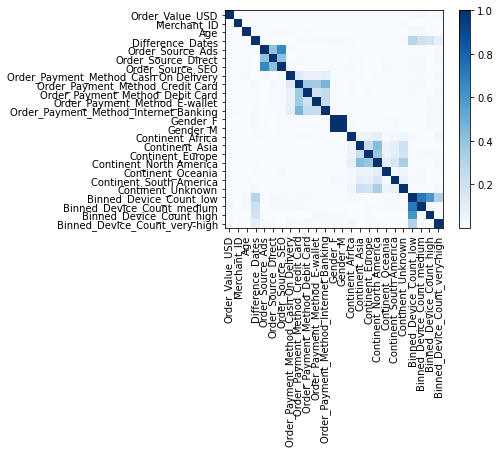

Most Correlated:


[('Order_Source_SEO', 'Order_Source_Ads', -0.6608221090861365),
 ('Binned_Device_Count_low',
  'Binned_Device_Count_medium',
  -0.7167713294703019),
 ('Binned_Device_Count_medium',
  'Binned_Device_Count_medium',
  0.9999999999999998)]

Least Correlated:


[('Continent_North America', 'Order_Value_USD', -6.043504436134938e-05),
 ('Order_Value_USD', 'Age', 6.594770392398972e-05),
 ('Continent_North America',
  'Order_Payment_Method_Credit Card',
  9.392273629632011e-05)]

In [85]:
#Correlation matrix
def correlation_matrix_from(dataframe):
    return np.corrcoef(dataframe, rowvar=False)

def corr_plot(dataframe):
    corr_matrix = correlation_matrix_from(dataframe)
    size = len(corr_matrix)
    
    plt.imshow(np.abs(corr_matrix), cmap=plt.cm.Blues, interpolation='nearest')
    plt.xticks(range(size), dataframe.columns, rotation=90)
    plt.yticks(range(size), dataframe.columns)
    plt.colorbar()
    plt.show()

def least_to_most(dataframe):
    corr_matrix = correlation_matrix_from(dataframe)
    size = len(corr_matrix)
    
    def sort_correlations():
        abs_corr_matrix = np.abs(corr_matrix)
        arg_sorted = np.argsort(abs_corr_matrix, axis=None)[:-size:2]  # Remove diagonals
        ix, iy = np.unravel_index(arg_sorted, abs_corr_matrix.shape)
        return ix, iy, corr_matrix.ravel()[arg_sorted]
    
    f1, f2, vals = sort_correlations()
    return list(zip(dataframe.columns[f1], dataframe.columns[f2], vals))


corr_plot(merged_train)
ordered_correlations = least_to_most(merged_train)

print("Most Correlated:")
display(ordered_correlations[-3:])

print("Least Correlated:")
display(ordered_correlations[:3])

pipeline

In [86]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, cat_attr)])


In [87]:
preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                           

In [88]:
##Split into train and test

#train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(merged_train, Y, test_size = 0.3, random_state= 123)

In [89]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((37949, 25), (16264, 25), (37949, 1), (16264, 1))

Model building



Logistic Regression - 1

In [90]:
clf_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])


In [91]:
clf_logreg.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [92]:
train_pred = clf_logreg.predict(X_train)
test_pred = clf_logreg.predict(X_test)

print(clf_logreg.score(X_train, Y_train))
print(clf_logreg.score(X_test, Y_test))
print("\n")
print(confusion_matrix(y_true=Y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=Y_test, y_pred =  test_pred)
confusion_matrix_test


0.9417639463490474
0.9389449090014756


[[34297   138]
 [ 2072  1442]]


array([[14688,    65],
       [  928,   583]])

In [93]:
#Accuracy Precision Recall on logistic model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred))
print("The recall score for train:",recall_score(Y_train, train_pred))
print("The F1 score for train:",f1_score(Y_train, train_pred))

The accuracy score for train: 0.9417639463490474
The precision score for train: 0.9126582278481012
The recall score for train: 0.4103585657370518
The F1 score for train: 0.5661562622693365


In [94]:
print("The accuracy score for test:",accuracy_score(Y_test, test_pred))
print("The precision score for test:",precision_score(Y_test, test_pred))
print("The recall score for test:",recall_score(Y_test, test_pred))
print("The F1 score for test:",f1_score(Y_test, test_pred))

The accuracy score for test: 0.9389449090014756
The precision score for test: 0.8996913580246914
The recall score for test: 0.385837193911317
The F1 score for test: 0.540064844835572


In [95]:
model_1_log= clf_logreg.predict(merged_test)
model_1_log

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
final= pd.DataFrame({'Merchant_ID' : merged_test['Merchant_ID'],
                     'Fraudster' : model_1_log})

In [97]:
final.to_csv("submission_log_1.csv",index=False)

Model -2  Decision tree

In [98]:
%%time
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 'classifier__max_depth': [6,8,10,12], 
                 "classifier__min_samples_split": [2, 10, 20],"classifier__min_samples_leaf": [1, 5, 10]}

dt_grid = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5)

dt_grid.fit(X_train,Y_train)

CPU times: user 1min 21s, sys: 438 ms, total: 1min 21s
Wall time: 1min 22s


In [99]:
dt_grid.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 6,
 'classifier__min_samples_leaf': 5,
 'classifier__min_samples_split': 2}

In [100]:
train_pred = dt_grid.predict(X_train)
test_pred = dt_grid.predict(X_test)

print(dt_grid.score(X_train, Y_train))
print(dt_grid.score(X_test, Y_test))

0.9500909114864687
0.9467535661583866


In [101]:
print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred))
print("The recall score for train:",recall_score(Y_train, train_pred))
print("The F1 score for train:",f1_score(Y_train, train_pred))

The accuracy score for train: 0.9500909114864687
The precision score for train: 0.8951219512195122
The recall score for train: 0.5221969265793966
The F1 score for train: 0.6595974119338605


In [102]:
print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred))
print("The recall score for train:",recall_score(Y_train, train_pred))
print("The F1 score for train:",f1_score(Y_train, train_pred))

The accuracy score for train: 0.9500909114864687
The precision score for train: 0.8951219512195122
The recall score for train: 0.5221969265793966
The F1 score for train: 0.6595974119338605


In [103]:
model_2_dt= dt_grid.predict(merged_test)
model_2_dt

array([0, 0, 0, ..., 0, 1, 0])

model -3 SVM


In [104]:
%%time
svc_lin = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])
svc_lin.set_params(classifier__kernel='linear',classifier__C=1,
                   classifier__random_state=123)

svc_lin.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 8.82 s, sys: 129 ms, total: 8.95 s
Wall time: 8.96 s


In [105]:
train_pred = svc_lin.predict(X_train)
test_pred = svc_lin.predict(X_test)

print(svc_lin.score(X_train, Y_train))
print(svc_lin.score(X_test, Y_test))

0.9417639463490474
0.9389449090014756


In [106]:
print(confusion_matrix(y_true=Y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=Y_test, y_pred =  test_pred)


[[34297   138]
 [ 2072  1442]]


In [107]:
print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred))
print("The recall score for train:",recall_score(Y_train, train_pred))
print("The F1 score for train:",f1_score(Y_train, train_pred))

The accuracy score for train: 0.9417639463490474
The precision score for train: 0.9126582278481012
The recall score for train: 0.4103585657370518
The F1 score for train: 0.5661562622693365


In [108]:
print("The accuracy score for test:",accuracy_score(Y_test, test_pred))
print("The precision score for test:",precision_score(Y_test, test_pred))
print("The recall score for test:",recall_score(Y_test, test_pred))
print("The F1 score for test:",f1_score(Y_test, test_pred))

The accuracy score for test: 0.9389449090014756
The precision score for test: 0.8996913580246914
The recall score for test: 0.385837193911317
The F1 score for test: 0.540064844835572


In [109]:
model_3_svm= svc_lin.predict(merged_test)
model_3_svm

array([0, 0, 0, ..., 0, 0, 0])

In [110]:
final= pd.DataFrame({'Merchant_ID' : merged_test['Merchant_ID'],
                     'Fraudster' : model_3_svm})